# Stereo matching

Author: Tobit Flatscher - github.com/2b-t

### Import required Python modules

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from matching_algorithm.semi_global_matching import SemiGlobalMatching
from matching_algorithm.winner_takes_it_all import WinnerTakesItAll

from matching_cost.normalised_cross_correlation import NormalisedCrossCorrelation
from matching_cost.sum_of_absolute_differences import SumOfAbsoluteDifferences
from matching_cost.sum_of_squared_differences import SumOfSquaredDifferences

from stereo_matching import StereoMatching
from utilities import AccX, IO

# Set algorithm parameters

In [3]:
example_number = 1 #number of example in the example list

max_disparity = 60 #maximum disparity to consider
filter_radius = 3  #radius of the window to consider around the scan line point

accx_threshold = 3  #accX tolerance

# Image import

In [4]:
# Select correct example
examples = ["bowling", "cones", "Adirondack"]
scenario_name  = examples[example_number]

# Read left and right images
left_image = IO.import_image("../data/" + scenario_name + "_left.png")
right_image = IO.import_image("../data/" + scenario_name + "_right.png")

# Try to read the ground-truth and mask
try:
    groundtruth_image   = IO.import_image("../data/" + scenario_name + "_gt.png")
    mask_image = IO.import_image("../data/" + scenario_name + "_mask.png")
except:
    groundtruth_image = None
    print("No ground truth found!")

<IPython.core.display.Javascript object>


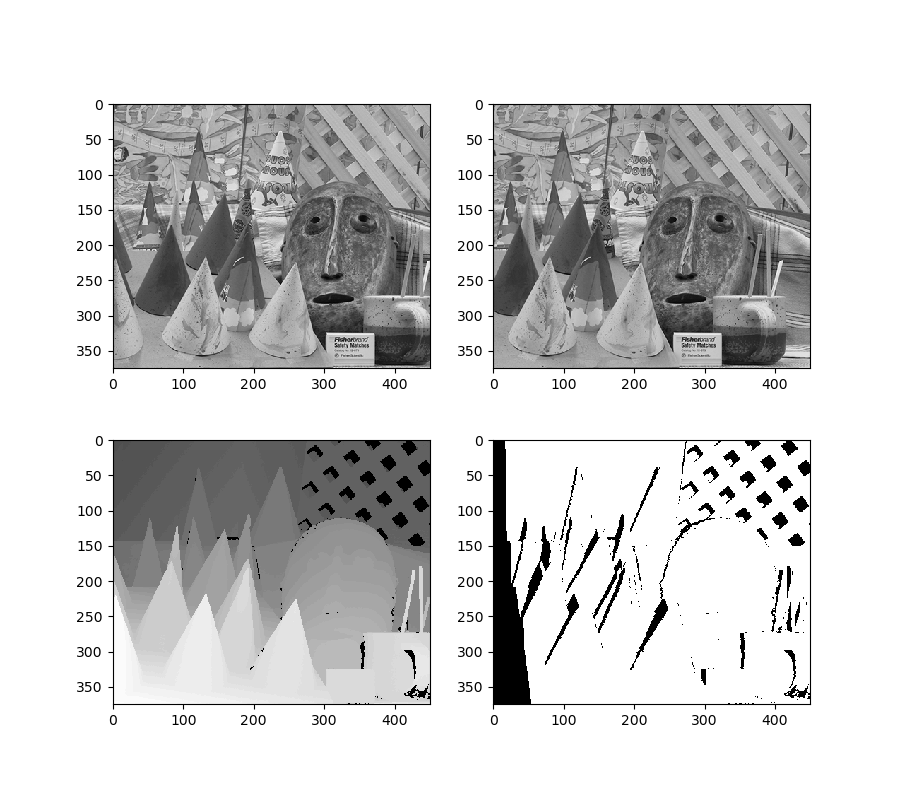

In [5]:
# Plot input images
fig = plt.figure(figsize=(9,8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(left_image, cmap='gray');
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(right_image, cmap='gray');

# Try to plot the ground-truth and mask
try:
    ax3 = fig.add_subplot(2,2,3)
    ax3.imshow(groundtruth_image, cmap='gray');
    ax4 = fig.add_subplot(2,2,4)
    ax4.imshow(mask_image, cmap='gray');
except:
    print("No ground truth found!") 

In [6]:
from matching_algorithm.matching_algorithm import MatchingAlgorithm
from matching_cost.matching_cost import MatchingCost

def compute_and_display(left_image: np.ndarray, right_image: np.ndarray, 
                        matching_cost: MatchingCost, matching_algorithm: MatchingAlgorithm, 
                        max_disparity: int, filter_radius: int, 
                        groundtruth_image: np.ndarray, mask_image: np.ndarray, accx_threshold:int) -> None:
    # Convenience function for repetitive computation of images and displaying them
    #   @param[in] left_image: The left stereo image (H,W)
    #   @param[in] right_image: The right stereo image (H,W)
    #   @param[in] matching_cost: The class implementing the matching cost
    #   @param[in] matching_algorithm: The class implementing the matching algorithm
    #   @param[in] max_disparity: The maximum disparity to consider
    #   @param[in] filter_radius: The radius of the filter
    #   @param[in] groundtruth_image: Ground-truth
    #   @param[in] mask_image: The mask for excluding invalid pixels such as occluded areas
    #   @param[in] accx_threshold: Threshold disparity measure for accX accuracy measure (X)
    
    sm = StereoMatching(left_image, right_image, matching_cost, matching_algorithm, max_disparity, filter_radius)
    sm.compute()
    res_image = sm.result()

    try:
        accx = AccX.compute(res_image, groundtruth_image, mask_image, accx_threshold)
        print("AccX measure: " + str(accx))
    except:
        accx = None
        print("No ground truth found!")

    plt.figure()
    plt.imshow(res_image, cmap='gray');
    return

# Winner-takes-it-all (WTA)

## Sum of absolute differences (SAD) & winner-takes-it-all (WTA)

AccX measure: 0.8641315676111335


<IPython.core.display.Javascript object>


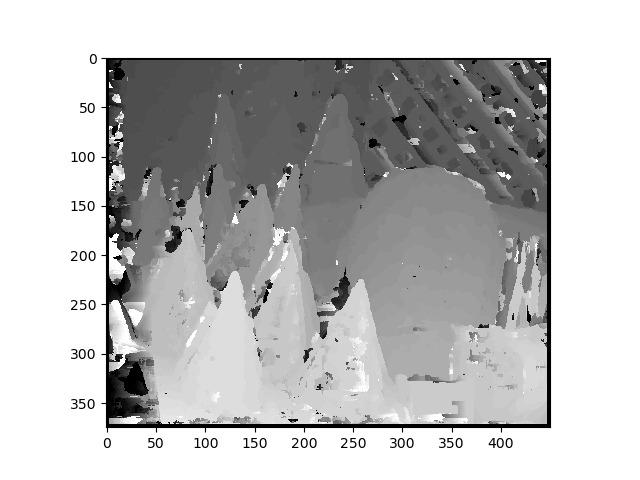

In [7]:
compute_and_display(left_image, right_image, SumOfAbsoluteDifferences, WinnerTakesItAll, max_disparity, filter_radius, groundtruth_image, mask_image, accx_threshold)

## Sum of squared differences (SSD) & winner-takes-it-all (WTA)

AccX measure: 0.8813070605727944


<IPython.core.display.Javascript object>


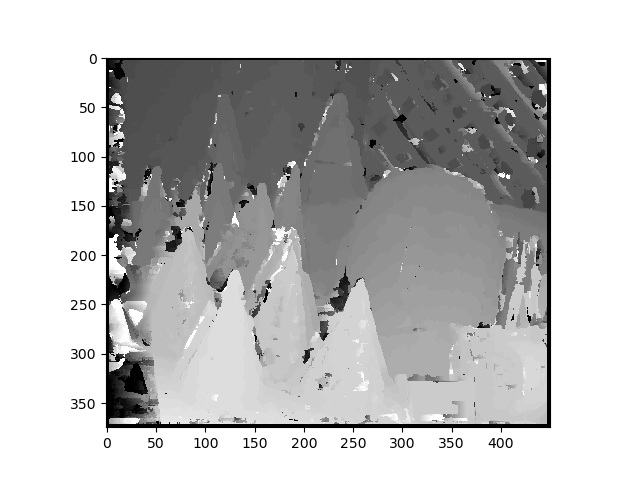

In [8]:
compute_and_display(left_image, right_image, SumOfSquaredDifferences, WinnerTakesItAll, max_disparity, filter_radius, groundtruth_image, mask_image, accx_threshold)

## Normalised cross-correlation (NCC) & winner-takes-it-all (WTA)

AccX measure: 0.9100648944596529


<IPython.core.display.Javascript object>


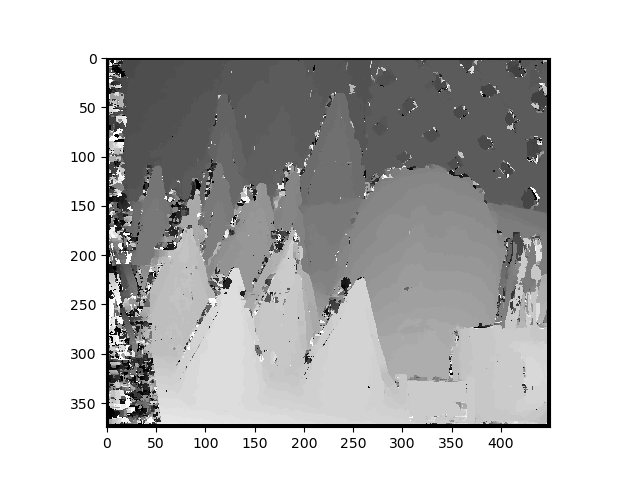

In [9]:
compute_and_display(left_image, right_image, NormalisedCrossCorrelation, WinnerTakesItAll, max_disparity, filter_radius, groundtruth_image, mask_image, accx_threshold)

# Semi-global matching (SGM)

## Sum of absolute differences (SAD) & semi-global matching (SGM)

AccX measure: 0.9104609313119242


<IPython.core.display.Javascript object>


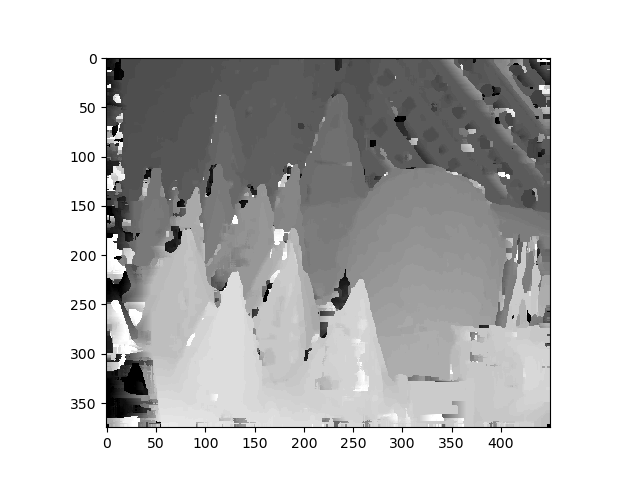

In [10]:
compute_and_display(left_image, right_image, SumOfAbsoluteDifferences, SemiGlobalMatching, max_disparity, filter_radius, groundtruth_image, mask_image, accx_threshold)

## Sum of squared differences (SSD) & semi-global matching (SGM)

AccX measure: 0.9516904520378527


<IPython.core.display.Javascript object>


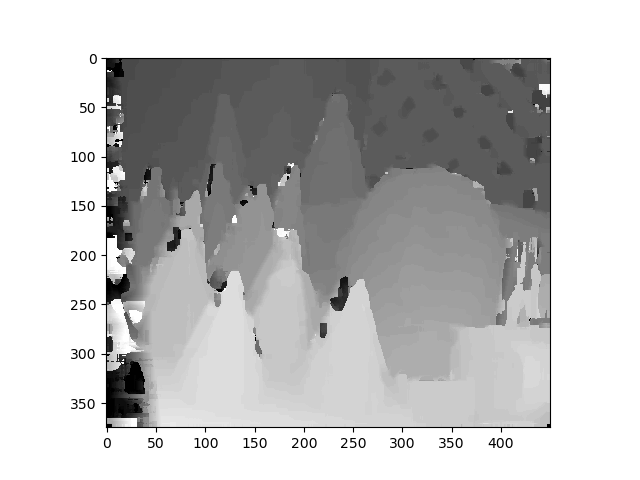

In [11]:
compute_and_display(left_image, right_image, SumOfSquaredDifferences, SemiGlobalMatching, max_disparity, filter_radius, groundtruth_image, mask_image, accx_threshold)

## Normalised cross-correlation (NCC) & semi-global matching (SGM)

AccX measure: 0.9515723357836666


<IPython.core.display.Javascript object>


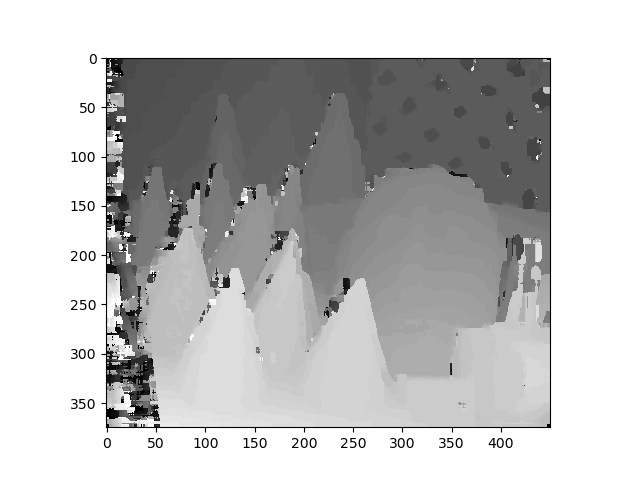

In [12]:
compute_and_display(left_image, right_image, NormalisedCrossCorrelation, SemiGlobalMatching, max_disparity, filter_radius, groundtruth_image, mask_image, accx_threshold)